Drop Table Code if I even need to use it

In [ ]:
import sqlite3

conn = sqlite3.connect("Hero.db")
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS Enter Table Name;")
conn.commit()
conn.close()

Importing the libraries I will need to use.

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3


Importing the data from the datasets into a Data Frame.

df.DCComics is for the DC Comic Heroes dataset.

df.Marvel is for the Marvel Comic Heroes dataset.

df.attributes is the dataset that has the attributes the heroes possess.

    Intelligence
    Strength
    Speed
    Durability
    Raw Power Score	
    Combat Ability

df.powers is the dataset that has the powers that each hero possess.

In [2]:
DCComicsdf = pd.read_csv("data/dc-wikia-data_updated.csv", encoding='utf-8')
MarvelComicsdf = pd.read_csv("data/marvel-wikia-data_update.csv", encoding='utf-8')
Superheroes_datadf = pd.read_csv("data/superheroes_data.csv", encoding='utf-8')
superherosdf = pd.read_csv("data/superheroes.csv", encoding='utf-8')
print(DCComicsdf.head())
print(MarvelComicsdf.head())
print(Superheroes_datadf.head())
print(superherosdf.head())

   id             name       full-name                              urlslug  \
0   1           batman   (bruce wayne)         \/wiki\/batman_(bruce_wayne)   
1   2         superman    (clark kent)        \/wiki\/superman_(clark_kent)   
2   3    green lantern    (hal jordan)   \/wiki\/green_lantern_(hal_jordan)   
3   4     james gordon     (new earth)     \/wiki\/james_gordon_(new_earth)   
4   5  richard grayson     (new earth)  \/wiki\/richard_grayson_(new_earth)   

          identity            align         eye        hair              sex  \
0  secret identity  good characters   blue eyes  black hair  male characters   
1  secret identity  good characters   blue eyes  black hair  male characters   
2  secret identity  good characters  brown eyes  brown hair  male characters   
3  public identity  good characters  brown eyes  white hair  male characters   
4  secret identity  good characters   blue eyes  black hair  male characters   

   gsm              alive appearances first 

C:\Users\charl\AppData\Local\Temp\ipykernel_18876\571155349.py:4: DtypeWarning: Columns (17,18,20,24,25,26,28,31,32,33,34,36,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273

Getting the Column Names for DC from the CSV

In [3]:
column_names = DCComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'urlslug', 'identity', 'align', 'eye', 'hair', 'sex', 'gsm', 'alive', 'appearances', 'first appearance', 'year', 'Unnamed: 14']


Getting the Column Names for Marvel from the CSV

In [4]:
column_names = MarvelComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'urlslug', 'identity', 'align', 'eye', 'hair', 'sex', 'gsm', 'alive', 'appearances', 'first appearance', 'year']


Getting the Column Names for the SuperHero Ability stats

In [5]:
column_names = Superheroes_datadf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 'full-name', 'alter-egos', 'aliases', 'place-of-birth', 'first-appearance', 'publisher', 'alignment', 'gender', 'race', 'height', 'weight', 'eye-color', 'hair-color', 'occupation', 'base', 'group-affiliation', 'relatives', 'url']


Getting the Column Names for the SuperHeroes Power List

In [6]:
column_names = superherosdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'Alignment', 'Alter_Egos', 'Base', 'Character', 'Class_value', 'Collections', 'Combat', 'Creator', 'Durability', 'Equipment', 'Eye_color', 'Formerly', 'Full_name', 'Gender', 'Hair_color', 'Height', 'IQ', 'Intelligence', 'Leader', 'Level', 'Member', 'Name', 'Occupation', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Place_of_birth', 'Power', 'Relatives', 'Species', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force', 'Super_powers', 'Tier', 'Universe', 'Weight', 'History', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unna

Testing out Filtering the SuperHero Powers CSV as I only want to see DC and Marvel publishers

In [7]:
filteredDC_df = superherosdf[superherosdf['Creator'] == 'DC Comics']
print("Filtered DC Comics DataFrame:\n", filteredDC_df)

filteredMarvel_df = superherosdf[superherosdf['Creator'] == 'Marvel Comics']
print("Filtered Marvel Comics DataFrame:\n", filteredMarvel_df)

Filtered DC Comics DataFrame:
             id Alignment                                         Alter_Egos  \
26        27.0      Good                                                NaN   
27        28.0      Good                                                NaN   
57        58.0      Good                                                NaN   
58        59.0      Good                                                NaN   
59        60.0      Good                                                NaN   
...        ...       ...                                                ...   
28401  28402.0         -  Anti-Monitor,Anti-Monitor,Anti-Monitor,Anti-Mo...   
28403  28404.0      Good                                                NaN   
28404  28405.0       NaN                                        Doctor Fate   
28405  28406.0      Good                                                NaN   
28407  28408.0      Good                                                NaN   

                    

Creating the SQLite Tables for each CSV File.

In [8]:
# Create SQLite database and tables
conn = sqlite3.connect("Hero.db")
cursor = conn.cursor()

# Create tables DC_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS DCHeroes (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances INTEGER NOT NULL,
    first appearance INTEGER NOT NULL,
    year INTEGER NOT NULL
);
""")

# Create tables Marvel_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS MarvelHeroes (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances INTEGER NOT NULL,
    first appearance INTEGER NOT NULL,
    year INTEGER NOT NULL
);
""")
# Create tables SuperHeroes_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroes (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    intelligence INTEGER NOT NULL,
    strength INTEGER NOT NULL,
    speed INTEGER NOT NULL,
    durability INTEGER NOT NULL,
    power INTEGER NOT NULL,
    combat INTEGER NOT NULL,
    full_name TEXT NOT NULL,
    alter_egos TEXT NOT NULL, 
    aliases TEXT NOT NULL,
    place_of_birth TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    publisher TEXT NOT NULL,
    alignment TEXT NOT NULL,
    gender TEXT NOT NULL,
    race TEXT NOT NULL,
    height INTEGER NOT NULL,
    weight INTEGER NOT NULL,
    eye_color TEXT NOT NULL,
    hair_color TEXT NOT NULL,
    occupation TEXT NOT NULL,
    base TEXT NOT NULL,
    group_affiliation TEXT NOT NULL, 
    relatives TEXT NOT NULL,
    url TEXT NOT NULL
);
""")
# Create tables SuperHeroesPowers_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroesPowers (
    id INTEGER PRIMARY KEY,
    Creator TEXT NOT NULL,
    Durability INTEGER NOT NULL, 
    Equipment INTEGER NOT NULL, 
    Eye_color TEXT NOT NULL,
    Gender TEXT NOT NULL,
    Hair_color TEXT NOT NULL,
    IQ INTEGER NOT NULL, 
    Intelligence INTEGER NOT NULL, 
    Name TEXT NOT NULL,
    Occupation TEXT NOT NULL,
    Power TEXT NOT NULL,
    Relatives TEXT NOT NULL,
    Speed INTEGER NOT NULL, 
    Strength INTEGER NOT NULL, 
    Super_powers TEXT NOT NULL,
    Weight INTEGER NOT NULL
);
""")
# Insert data into tables
DCComicsdf.to_sql("DCHeroes", conn, if_exists="replace", index=False)
MarvelComicsdf.to_sql("MarvelHeroes", conn, if_exists="replace", index=False)
Superheroes_datadf.to_sql("SuperHeroes", conn, if_exists="replace", index=False)
filteredDC_df.to_sql("SuperHeroesPowers", conn, if_exists="replace", index=False)
filteredMarvel_df.to_sql("SuperHeroesPowers", conn, if_exists="replace", index=False)

# Verify data was inserted
print("DC Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM DCHeroes", conn))

print("\Marvel Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM MarvelHeroes", conn))


print("Super Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroes", conn))

print("\Super Heroes Powers Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroesPowers", conn))


<>:102: SyntaxWarning: invalid escape sequence '\M'
<>:109: SyntaxWarning: invalid escape sequence '\S'
<>:102: SyntaxWarning: invalid escape sequence '\M'
<>:109: SyntaxWarning: invalid escape sequence '\S'
C:\Users\charl\AppData\Local\Temp\ipykernel_18876\4122961608.py:102: SyntaxWarning: invalid escape sequence '\M'
  print("\Marvel Heroes Table:\n")
C:\Users\charl\AppData\Local\Temp\ipykernel_18876\4122961608.py:109: SyntaxWarning: invalid escape sequence '\S'
  print("\Super Heroes Powers Table:\n")


DC Heroes Table:

        id              name       full-name  \
0        1            batman   (bruce wayne)   
1        2          superman    (clark kent)   
2        3     green lantern    (hal jordan)   
3        4      james gordon     (new earth)   
4        5   richard grayson     (new earth)   
...    ...               ...             ...   
6891  6892       nadine west     (new earth)   
6892  6893    warren harding     (new earth)   
6893  6894  william harrison     (new earth)   
6894  6895  william mckinley     (new earth)   
6895  6896            mookie     (new earth)   

                                   urlslug         identity            align  \
0             \/wiki\/batman_(bruce_wayne)  secret identity  good characters   
1            \/wiki\/superman_(clark_kent)  secret identity  good characters   
2       \/wiki\/green_lantern_(hal_jordan)  secret identity  good characters   
3         \/wiki\/james_gordon_(new_earth)  public identity  good characters   
4    

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes exist of each Gender.

Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.
Count for each sex category:
sex
male characters           4780
female characters         1966
genderless characters       20
transgender characters       1
Name: count, dtype: int64


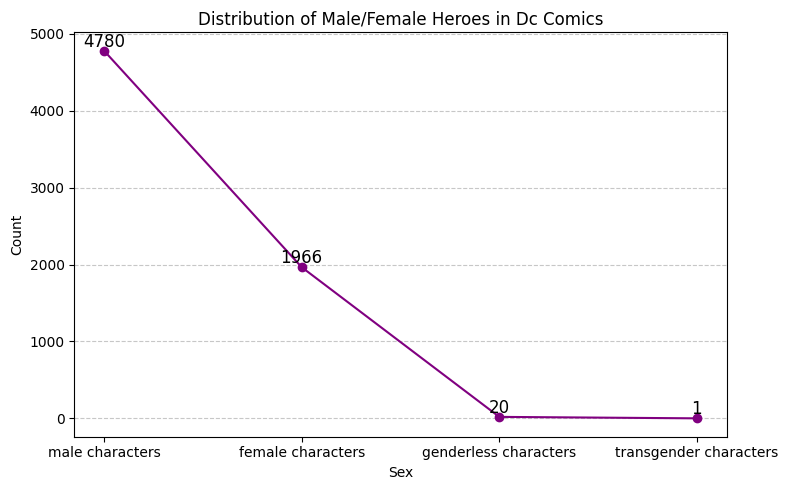

In [68]:
def hero_gender_distribution():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        hero_gender_distribution()
        return

    # Connect to your SQLite database
    conn = sqlite3.connect('Hero.db')

    # Query for all heroes' sex
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 5))
    plt.plot(sex_counts.index, sex_counts.values, marker='o', linestyle='-', color='purple')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.title(f'Distribution of Male/Female Heroes in {publisher_choice.title()}')
    for i, v in enumerate(sex_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_distribution()

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes are deceased by publisher and Gender.

Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.
Deceased hero counts by sex for dc comics:
sex
male characters           1270
female characters          392
genderless characters        5
transgender characters       1
Name: count, dtype: int64


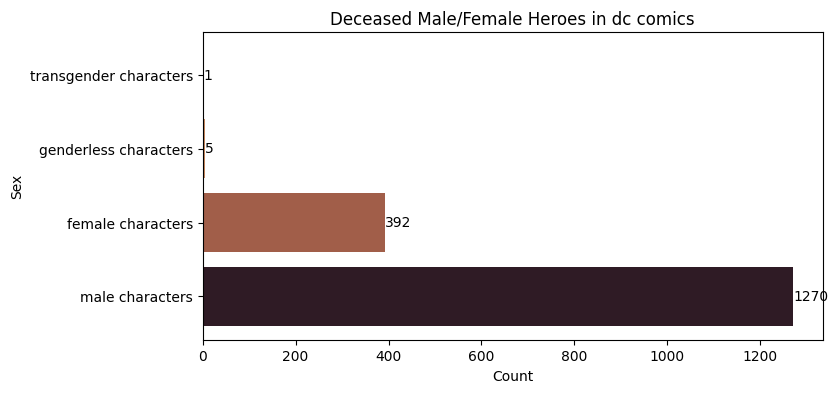

In [69]:
def deceased_hero_gender_ratio():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        deceased_hero_gender_ratio()
        return

    # Connect to the database
    conn = sqlite3.connect('Hero.db')
    # Query for deceased heroes (living or deceased characters') and their sex
    query = f"SELECT sex FROM {table_name} WHERE alive='deceased characters'"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print(f"Deceased hero counts by sex for {publisher}:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 4))
    plt.barh(sex_counts.index, sex_counts.values, color=['#2F1B25', '#A15E49', '#CA895F', '#E3D26F'])
    plt.xlabel('Count')
    plt.ylabel('Sex')
    plt.title(f'Deceased Male/Female Heroes in {publisher}')
    for i, v in enumerate(sex_counts.values):
        plt.text(v + 1, i, str(v), va='center')
    plt.show()

# Call the function
deceased_hero_gender_ratio()

The below code will join the selected Publisher dataset with the superheroespowers dataset to display each heroes powers along with other stats. (Using SQLite tables for this functionality).

In [ ]:
def join_publisher_with_powers_and_display():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        join_publisher_with_powers_and_display()
        return

    # Connect to the database
    conn = sqlite3.connect('Hero.db')

    # Perform SQL JOIN on UPPERCASE name fields
    query = f"""
        SELECT h.name, h.identity, h.align, h.eye, h.hair, h.sex, h.alive, p.Alignment, p.Creator, p.gender, p.Hair_color,p.name, p.Occupation, p.Super_powers
        FROM {table_name} h
        JOIN SuperPowers p
        ON UPPER(h.name) = UPPER(p.Name)
        WHERE p.Creator like '{publisher}'
    """
    merged_df = pd.read_sql(query, conn)
    conn.close()
#Display the results
    print(f"Merged data for {publisher}:")
    display(merged_df)

# Calling the function
join_publisher_with_powers_and_display()

Merged data for Marvel Comics:


,name,identity,align,eye,hair,sex,alive,Alignment,Creator,Gender,Hair_color,Name,Occupation,Super_powers
0,aldrich killian,no dual identity,neutral characters,brown eyes,brown hair,male characters,deceased characters,Bad,Marvel Comics,Male,-,Aldrich Killian,None,"Accelerated Healing,Cold Resistance,Energy Bea..."
1,aldrich killian,no dual identity,neutral characters,brown eyes,brown hair,male characters,deceased characters,Bad,Marvel Comics,Male,-,Aldrich Killian,None,"Accelerated Healing,Cold Resistance,Energy Bea..."
2,aldrich killian,no dual identity,neutral characters,brown eyes,brown hair,male characters,deceased characters,Bad,Marvel Comics,Male,-,Aldrich Killian,None,"Accelerated Healing,Cold Resistance,Energy Bea..."
3,warren worthington iii,public identity,good characters,blue eyes,blond hair,male characters,living characters,Bad,Marvel Comics,Male,Blond,Warren Worthington III,Servant of Apocalypse & Mister Sinister,"Flight,Wing Manifestation"
4,warren worthington iii,secret identity,bad characters,None,blond hair,female characters,living characters,Bad,Marvel Comics,Male,Blond,Warren Worthington III,Servant of Apocalypse & Mister Sinister,"Flight,Wing Manifestation"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,james proudstar,secret identity,good characters,brown eyes,black hair,male characters,living characters,None,Marvel Comics,None,None,James Proudstar,None,None
5262,hope summers,secret identity,good characters,green eyes,red hair,female characters,living characters,Good,Marvel Comics,Female,Red,Hope Summers,None,None
5263,robert reynolds,secret identity,neutral characters,blue eyes,blond hair,male characters,living characters,Bad,Marvel Comics,Male,None,Robert Reynolds,None,"Ability Shift,Accelerated Development,Accelera..."
5264,brian dewolff,public identity,neutral characters,blue eyes,strawberry blond hair,male characters,deceased characters,Bad,Marvel Comics,Male,Blond,Brian DeWolff,None,None


Here’s a function that lets the user select a publisher and displays the gender distribution as a pie chart, ensuring all values and labels are visible:

Count for each sex category:
sex
male characters           4780
female characters         1966
genderless characters       20
transgender characters       1
Name: count, dtype: int64


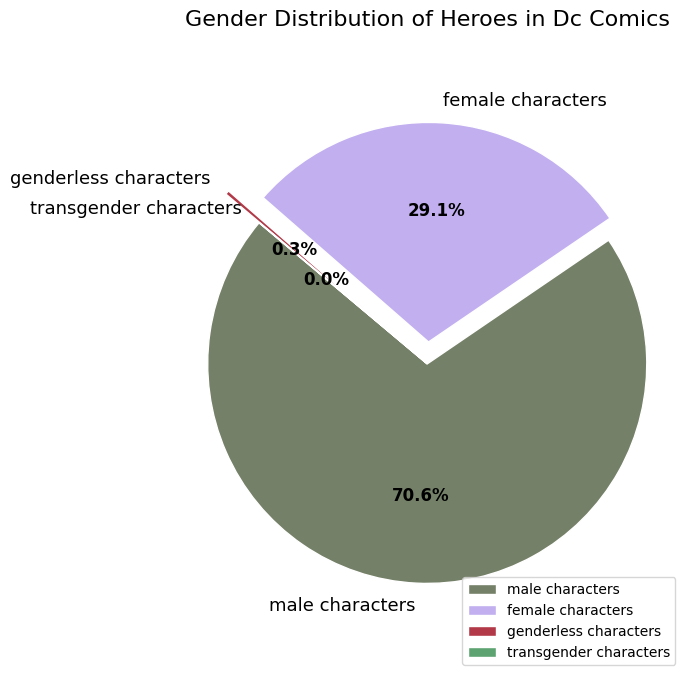

In [71]:
def hero_gender_pie_chart():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        hero_gender_distribution()
        return

    conn = sqlite3.connect('Hero.db')
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()

    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)
    explode_values = [0, 0.1, 0.2, 0]
    # Pie chart with all values and labels visible
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        sex_counts.values,
        colors=['#748067', '#C2AFF0', '#B23A48', '#5DA271'],
        explode=explode_values,
        labels=sex_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 13},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.setp(texts, size=13)
    plt.legend(loc = 'best')
    plt.setp(autotexts, size=12, weight="bold")
    plt.title(f"Gender Distribution of Heroes in {publisher_choice.title()}", fontsize=16)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_pie_chart()